# Entropy 

YT Video - https://www.youtube.com/watch?v=YtebGVx-Fxw&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=8

Measures uncertainty or average surprise in a set of outcomes.

In data science, we use it to quantify the similarity or difference within a set of data, which is fundamental for algorithms like Decision Trees.

### Surprise

To understand Entropy, we first need to understand "Surprise". **Surprise is inversely related to probability.**

*   An event with a **low probability** is very surprising if it happens.
*   An event with a **high probability** is not very surprising if it happens.

### Deriving the Surprise Formula: The Logic

* **Intuition:** High probability = low surprise. A good first guess is `1 / Probability`.

* **The Problem:** When an event is certain (Probability = 1), our surprise should be **0**. But `1 / 1 = 1`.

* **The Fix:** We need an operation that turns `1` into `0`. The `log()` function does exactly this: `log(1) = 0`.

Therefore, the final formula is:

**Surprise = log(1 / Probability)**

Let's implement this formula. We'll use a biased coin that lands on "Heads" 90% of the time to test our function. The less likely outcome (Tails) should have a higher surprise value.



In [1]:
import numpy as np

def calculate_surprise(probability):
    """Calculate how surprising an event is based on its probability"""
    # Lower probability = higher surprise
    return np.log2(1 / probability)

# Test with a biased coin
prob_heads = 0.9  # 90% chance of heads
prob_tails = 0.1  # 10% chance of tails

# Calculate surprise for each outcome
surprise_heads = calculate_surprise(prob_heads)
surprise_tails = calculate_surprise(prob_tails)

# Show results
print(f"Heads (90% likely): {surprise_heads:.2f} surprise")
print(f"Tails (10% likely): {surprise_tails:.2f} surprise")

Heads (90% likely): 0.15 surprise
Tails (10% likely): 3.32 surprise


### The Relationship Between Probability and Surprise

As we've established, surprise and probability have a clear **inverse relationship**. As the probability of an event approaches zero (becomes very rare), its surprise value approaches infinity. As the probability of an event approaches one (becomes certain), its surprise value approaches zero. A graph is the perfect way to visualize this.


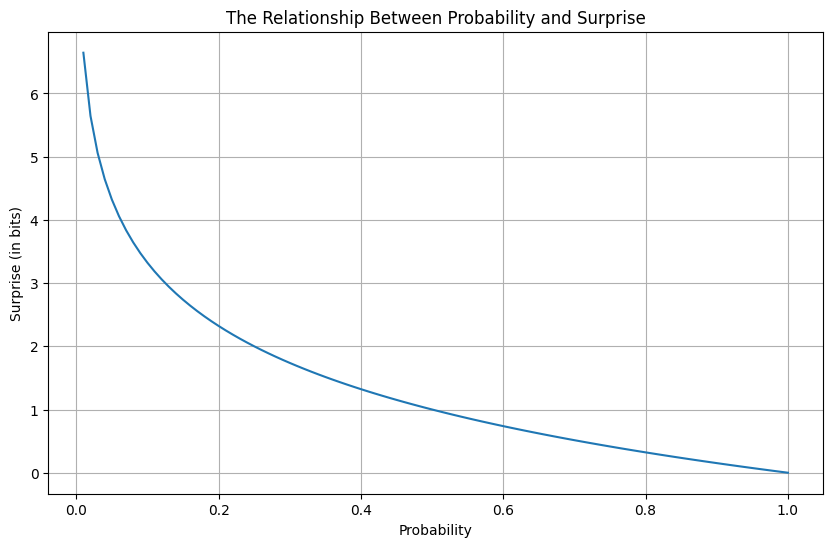

In [2]:
import matplotlib.pyplot as plt

# Create a range of probabilities from nearly 0 to 1
probabilities = np.linspace(0.01, 1, 100)

# Calculate the surprise for each probability in our range
surprises = [calculate_surprise(p) for p in probabilities]

# --- Plotting the graph ---
plt.figure(figsize=(10, 6))
plt.plot(probabilities, surprises)
plt.title("The Relationship Between Probability and Surprise")
plt.xlabel("Probability")
plt.ylabel("Surprise (in bits)")
plt.grid(True)
plt.show()

Lower Probability = Higher Surprise

### From Surprise to Entropy

Now that we understand **Surprise**, we can define **Entropy**. Entropy is simply the **average surprise** for a set of all possible outcomes. To get this average, you weigh the surprise of each outcome by its probability and then sum the results.

*   A high entropy means the system is very unpredictable.
*   A low entropy means one outcome is very likely, making the system predictable.

**1. The General Formula for Expected Value**

An expected value is just a weighted average. The formula is:

`Expected Value = Σ (value × probability of that value)`

**2. Applying This to Entropy**

For Entropy, the "value" we care about is **Surprise**. So we can write the formula as:

`Entropy = Σ [Surprise(x) × p(x)]`

**3. The Final Intuitive Formula**

Now, we just substitute our formula for Surprise (`log(1/p(x))`) into the equation above. This gives us the most intuitive version of the Entropy formula:

**`Entropy = Σ [p(x) × log(1 / p(x))]`**



### Entropy For Two Outcomes (Biased coin)


In [2]:
# Define probabilities of heads and tails
p = np.array([0.7, 0.3])

# Calculate entropy
entropy = -np.sum(p * np.log2(p))
print("Entropy (biased coin):", entropy, "bits")

Entropy (biased coin): 0.8812908992306927 bits


* Fair coin (0.5 / 0.5) → entropy = 1.0

* Biased coin → lower entropy

### Entropy of Uniform Distribution

In [3]:
# Equal probability of 4 outcomes (4 sided die)
p_uniform = np.array([0.25, 0.25, 0.25, 0.25])

# Calculate entropy
entropy_uniform = -np.sum(p_uniform * np.log2(p_uniform))
print("Entropy (uniform distribution):", entropy_uniform, "bits")

Entropy (uniform distribution): 2.0 bits


* More outcomes --> More entropy

* Max uncertainty when all outcomes are equally likely

